In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



In [2]:
df= pd.read_csv("thyroid_data.csv")


In [3]:
import pandas as pd
import joblib
import os
from sklearn.preprocessing import StandardScaler

# Veriyi okuyalım
df = pd.read_csv("thyroid_data.csv")

# SHAP için uygun X oluştur (get_dummies ile)
X = pd.get_dummies(df.drop("Recurred", axis=1), drop_first=True)
y = df["Recurred"]

# Ölçekleyelim
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Klasörleri oluştur(mkdir)
os.makedirs("scaler", exist_ok=True)

# oluşturdugumuz dosyaları kaydedelim
joblib.dump(scaler, "scaler/scaler.pkl")
joblib.dump(X.columns.tolist(), "scaler/feature_names.pkl")

print(f" scaler.pkl ve feature_names.pkl başarıyla kaydedildi. Özellik sayısı: {X.shape[1]}")


 scaler.pkl ve feature_names.pkl başarıyla kaydedildi. Özellik sayısı: 40


In [4]:
from sklearn.model_selection import train_test_split

# Ana veri
df = pd.read_csv("thyroid_data.csv")
X = pd.get_dummies(df.drop("Recurred", axis=1), drop_first=True)
y = df["Recurred"].replace({"No": 0, "Yes": 1})

# StandardScaler ile ölçekleme (eğer scaler.pkl kullanılmıyorsa)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test dosyalarına ayıralım
x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


C:\Users\Acer\AppData\Local\Temp\ipykernel_13740\1033818582.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df["Recurred"].replace({"No": 0, "Yes": 1})


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr_model = LogisticRegression(max_iter=1000, random_state=42)

lr_model.fit(x_train, y_train)

y_pred_lr = lr_model.predict(x_test)                                    #  logistic regresyon modeli

print("Logistic Regression Raporu:\n")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Raporu:

[[54  1]
 [ 2 20]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.95      0.91      0.93        22

    accuracy                           0.96        77
   macro avg       0.96      0.95      0.95        77
weighted avg       0.96      0.96      0.96        77

Accuracy: 0.961038961038961


In [6]:
df = pd.read_csv("thyroid_data.csv")
X = pd.get_dummies(df.drop("Recurred", axis=1), drop_first=True)
y = df["Recurred"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
import joblib, os

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

os.makedirs("scaler", exist_ok=True)
joblib.dump(scaler, "scaler/scaler.pkl")
joblib.dump(X.columns.tolist(), "scaler/feature_names.pkl")


['scaler/feature_names.pkl']

In [7]:
from sklearn .tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(x_train, y_train)

y_pred_dt = dt_model.predict(x_test)         # karar agacı modeli
 
print("Decision Tree Raporu:\n")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Raporu:

[[50  5]
 [ 2 20]]
              precision    recall  f1-score   support

          No       0.96      0.91      0.93        55
         Yes       0.80      0.91      0.85        22

    accuracy                           0.91        77
   macro avg       0.88      0.91      0.89        77
weighted avg       0.92      0.91      0.91        77

accuracy: 0.9090909090909091


In [8]:
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import joblib

# Veriyi okuyalım ve one-hot encode edelim
df = pd.read_csv("thyroid_data.csv")
X = pd.get_dummies(df.drop("Recurred", axis=1), drop_first=True)
y = df["Recurred"]

# Eğitim/test ayıralım
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modeli eğitelim
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# Tahmin ve değerlendirme kısmı
y_pred_rf = rf_model.predict(x_test)
print("Random Forest Raporu:\n")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Kayıt klasörü ve modelin kaydını yapalım
os.makedirs("models", exist_ok=True)
joblib.dump(rf_model, "models/random_forest.pkl")


Random Forest Raporu:

[[55  0]
 [ 3 19]]
              precision    recall  f1-score   support

          No       0.95      1.00      0.97        55
         Yes       1.00      0.86      0.93        22

    accuracy                           0.96        77
   macro avg       0.97      0.93      0.95        77
weighted avg       0.96      0.96      0.96        77

Accuracy: 0.961038961038961


['models/random_forest.pkl']

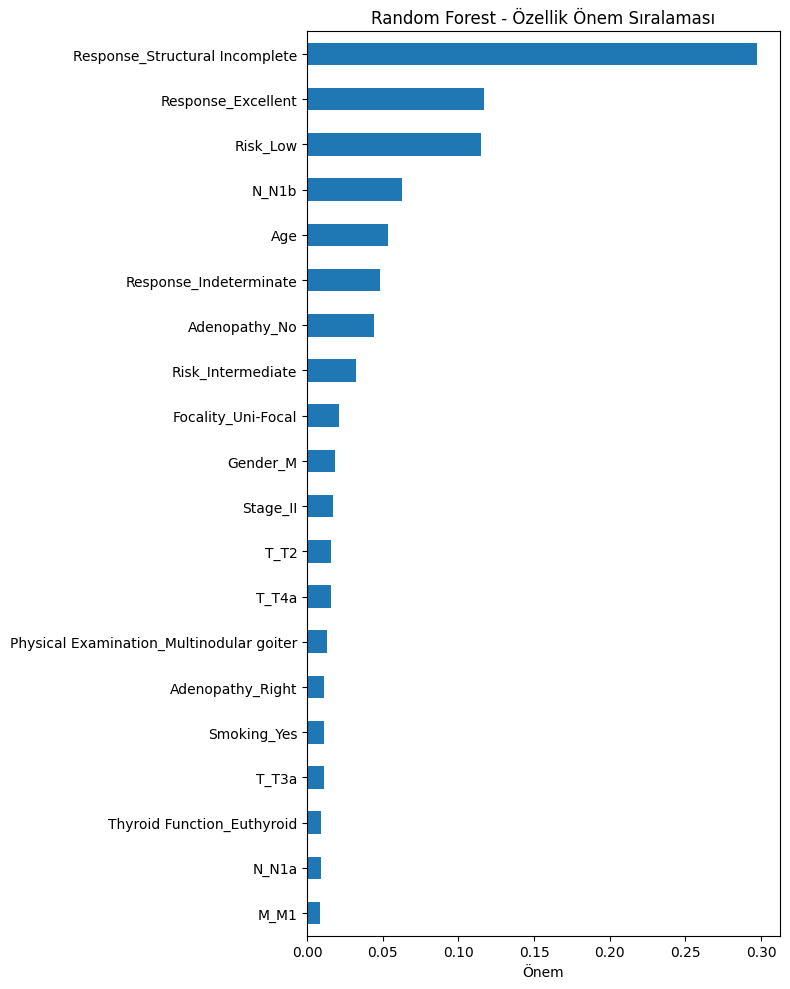

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.Series(importances, index=feature_names).sort_values()

plt.figure(figsize=(8, 10))
importance_df.tail(20).plot(kind='barh')  # en önemli 20 özelliği gösterir.
plt.title("Random Forest - Özellik Önem Sıralaması")
plt.xlabel("Önem")
plt.tight_layout()
plt.show()


In [10]:
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('dt', dt)],
    voting='soft'
  #ensemble learning modelleri (voting ( oylama))
)
                                                     
voting_clf.fit(x_train, y_train)
y_pred = voting_clf.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score

print("Voting Classifier Raporu:\n")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Voting Classifier Raporu:

              precision    recall  f1-score   support

          No       0.96      1.00      0.98        55
         Yes       1.00      0.91      0.95        22

    accuracy                           0.97        77
   macro avg       0.98      0.95      0.97        77
weighted avg       0.97      0.97      0.97        77

Accuracy: 0.974025974025974


In [11]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier()),
    ('rf',RandomForestClassifier())
]

meta_model = RandomForestClassifier()

stack_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
stack_model.fit(x_train, y_train)
y_pred_stack = stack_model.predict(x_test)

print("Stacking Classifier Raporu:\n")
print(classification_report(y_test, y_pred_stack))
print("Accuracy:", accuracy_score(y_test, y_pred_stack))


Stacking Classifier Raporu:

              precision    recall  f1-score   support

          No       0.96      0.98      0.97        55
         Yes       0.95      0.91      0.93        22

    accuracy                           0.96        77
   macro avg       0.96      0.95      0.95        77
weighted avg       0.96      0.96      0.96        77

Accuracy: 0.961038961038961


In [12]:
print(x_train.shape)           # Kaç özellikle eğitim yapıldı?     # kontrol amaçlı
print(x_train.columns.tolist())  # Hangi özelliklerle?              


(306, 40)
['Age', 'Gender_M', 'Smoking_Yes', 'Hx Smoking_Yes', 'Hx Radiothreapy_Yes', 'Thyroid Function_Clinical Hypothyroidism', 'Thyroid Function_Euthyroid', 'Thyroid Function_Subclinical Hyperthyroidism', 'Thyroid Function_Subclinical Hypothyroidism', 'Physical Examination_Multinodular goiter', 'Physical Examination_Normal', 'Physical Examination_Single nodular goiter-left', 'Physical Examination_Single nodular goiter-right', 'Adenopathy_Extensive', 'Adenopathy_Left', 'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right', 'Pathology_Hurthel cell', 'Pathology_Micropapillary', 'Pathology_Papillary', 'Focality_Uni-Focal', 'Risk_Intermediate', 'Risk_Low', 'T_T1b', 'T_T2', 'T_T3a', 'T_T3b', 'T_T4a', 'T_T4b', 'N_N1a', 'N_N1b', 'M_M1', 'Stage_II', 'Stage_III', 'Stage_IVA', 'Stage_IVB', 'Response_Excellent', 'Response_Indeterminate', 'Response_Structural Incomplete']
